In [3]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns#注意這裡有seaborn
%matplotlib inline

In [4]:
#使用資料夾內鐵達尼號的資料集，練習邏輯迴歸的處理邏輯
train = pd.read_csv('data/titanic_data.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

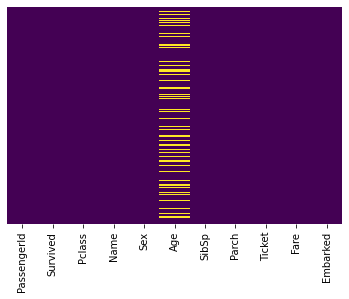

In [6]:
#探索資料
#用heatmap(.isnull()來找出缺失的資料在哪些欄位。Age似乎約有五分之一的資料缺失，可用合理資料補充。)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')#從seaborn 導入熱力圖

<AxesSubplot:xlabel='Survived', ylabel='count'>

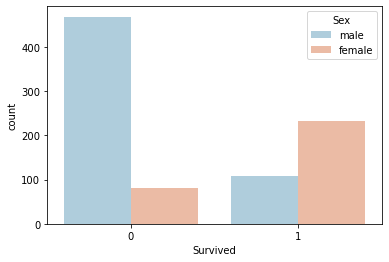

In [4]:
#用countplot來看性別是否影響最後存活。女性存活比例比男性高。
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

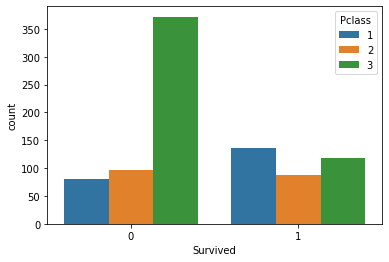

In [5]:
#艙等是否也影響存活?
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

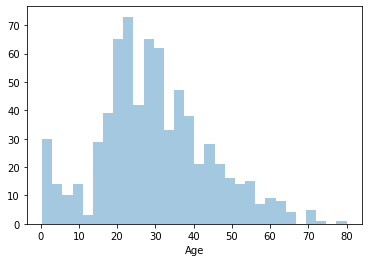

In [7]:
#用直方圖看年齡分佈。缺失資料在此不計。
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

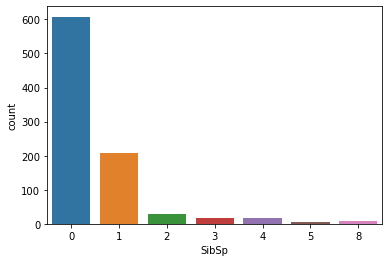

In [8]:
#SibSp代表兄弟姐妹或眷屬人數
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

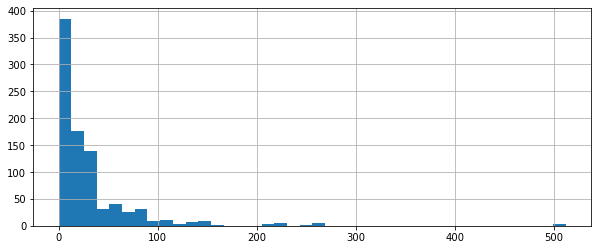

In [9]:
#用直方圖看票價分佈
train['Fare'].hist(bins=40,figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

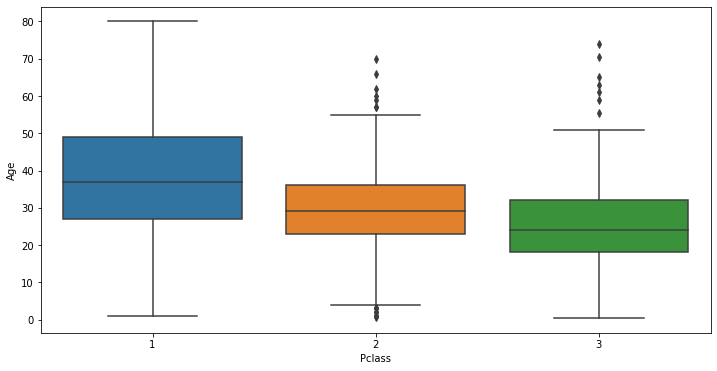

In [11]:
#資料清理
#剛有看到年齡資料約有五分之一缺失，一種做法是棄之不用，一種可以考慮把年齡平均放進去。
#使用盒鬚圖來看年齡和艙等的分佈。看起來頭等艙年齡較高，隨之降低。
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train)#可以試著調整XY軸，看看是否圖形更容易解釋

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

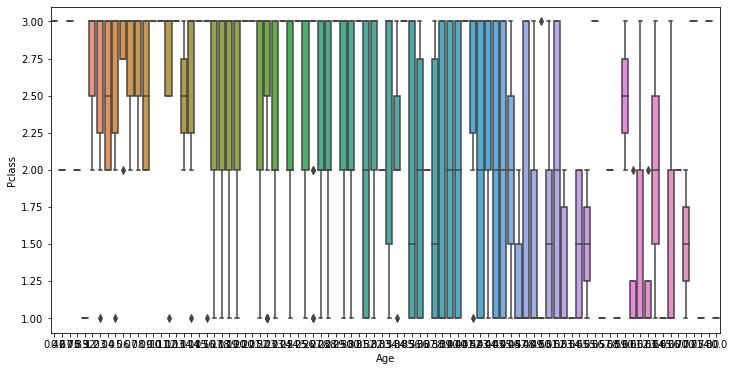

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age',y='Pclass',data=train)#可以試著調整XY軸，看看是否圖形更容易解釋
                                             #這個結果比較不容易解釋，所以比較不好

In [36]:
#把艙等平均年齡填入缺失的資料中
#艙等1平均年齡是37，艙等2平均年齡是29，艙等3平均年齡是24
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

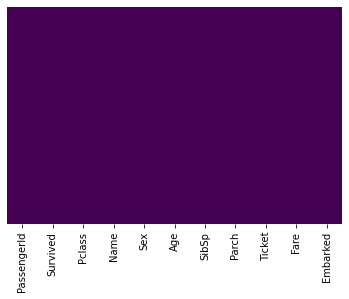

In [24]:
#用heatmap查看年齡是否還有缺失資料
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
train.dropna(inplace=True)#inplace： False: 返回新的數據集（默認） True: 在原數據集上操作
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 712, dtype: float64

In [38]:
Age_Mean = train[['Pclass','Age']].groupby( by=['Pclass'] ).mean()#算出每個艙等平均年齡與年齡中位數
Age_Median = train[['Pclass','Age']].groupby( by=['Pclass'] ).median()

Age_Mean.columns = ['Age Mean']
Age_Median.columns = ['Age Median']
Age_Mean.reset_index( inplace=True )
Age_Median.reset_index( inplace=True )

display( Age_Median )
display( Age_Mean )

,Pclass,Age Median
0,1,37.0
1,2,29.0
2,3,24.0


,Pclass,Age Mean
0,1,38.105543
1,2,29.877630
2,3,25.140620


In [20]:
#虛擬變數範例
#使用pandas(d.get_dummies)將性別從類別資料轉為數值變數。#這是實現one hot encode 的方法
sex = pd.get_dummies(train['Sex'],drop_first=True)
#請將drop_first=True，如果為True會刪除第一個類別值。
#本來若有k個level，drop_first=True會只剩下k-1個level，降低共線性的可能
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
#使用pandas將上船的港口從類別資料改換為數值變數(drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
#將性別及上船港口的數值變數和原始的data結合
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [23]:
#將原始的性別、登船港口、票號、姓名欄位棄用
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
#因為PassengerId在此也只是排序，因此也棄用
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
#建立feature資料集(選取survived以外所有欄位)與target資料集(survived)我們想知道存活率
X = train.drop('Survived',axis=1)
y = train['Survived']

In [26]:
#載入訓練組及測試組分組套件
from sklearn.model_selection import train_test_split

In [27]:
#設定隨機種子(random_state)為101，測試組比例佔30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

In [29]:
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#使用模型進行測試集資料的預測
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X_train)

In [31]:
#ground truth  ###就是y
print(y_test.values)
print(y_train.values)

[0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1]
[0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1

#### 計算accuracy及結果顯示
accuracy<br>
error_index #錯誤答案是哪幾筆資料<br>
miss classification #錯誤答案<br>
錯誤欄位的正確之原始資料表格

In [40]:
error_index2=np.where(predictions2!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(predictions!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))###注意這裡

train accuracy: 0.7991967871485943
test accuracy: 0.7897196261682243


In [33]:
print('error_index:',error_index)
print('miss classification :',predictions[error_index])#錯誤答案
data_index=train.iloc[error_index].index#這裡變數train是所有資料
train.iloc[data_index]#錯誤欄位的正確之原始資料

error_index: [  1   3   4   6   7  19  22  26  29  36  37  41  43  49  60  64  66  67
  71  74  83  99 101 110 116 125 126 129 132 144 150 153 154 155 157 158
 160 162 167 181 183 199 205 211 212]
miss classification : [0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1
 0 1 0 1 0 1 1 0]


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.00,1,0,71.2833,0,0,0
3,1,1,35.00,1,0,53.1000,0,0,1
4,0,3,35.00,0,0,8.0500,1,0,1
8,1,3,27.00,0,2,11.1333,0,0,1
9,1,2,14.00,1,0,30.0708,0,0,0
25,1,3,38.00,1,5,31.3875,0,0,1
33,0,2,66.00,0,0,10.5000,1,0,1
44,1,3,19.00,0,0,7.8792,0,1,0
52,1,1,49.00,1,0,76.7292,0,0,0
68,1,3,17.00,4,2,7.9250,0,0,1


In [ ]:
##結論: 艙等3錯誤率最高，應該再做0000調整